# Aplicación de SVD a una imagen
Una imagen computacionalmente es una matriz, por lo que nos convendrá descomponerla por medio de SVD para simplificar los cálculos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

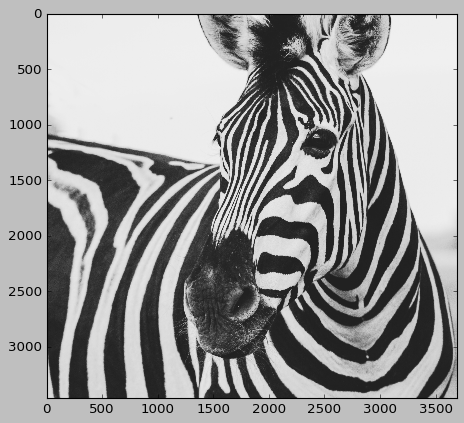

In [3]:
#mostramos una imagen con la que trabajaremos
plt.style.use('classic')

imagen = Image.open("./imagenes/imagen_ejemplo_frida_bredesen.jpg")

plt.imshow(imagen)

In [6]:
# pasamos a escala de grises
imagen_gr = imagen.convert('LA')
print(imagen_gr)

<PIL.Image.Image image mode=LA size=3693x3456 at 0x7F0761A0F370>


In [7]:
# toma todos los datos de la banda 0
imagen_mat = np.array(list(imagen_gr.getdata(band = 0)), float)
print(imagen_mat)

[236. 236. 235. ... 195. 195. 193.]


In [8]:
# lo pasamos a forma de matriz
imagen_mat.shape = (imagen_gr.size[1], imagen_gr.size[0])
print(imagen_mat)

[[236. 236. 235. ... 239. 239. 239.]
 [236. 236. 235. ... 239. 239. 239.]
 [236. 236. 235. ... 238. 238. 238.]
 ...
 [217. 216. 216. ... 197. 196. 194.]
 [216. 216. 216. ... 196. 195. 193.]
 [216. 216. 216. ... 195. 195. 193.]]


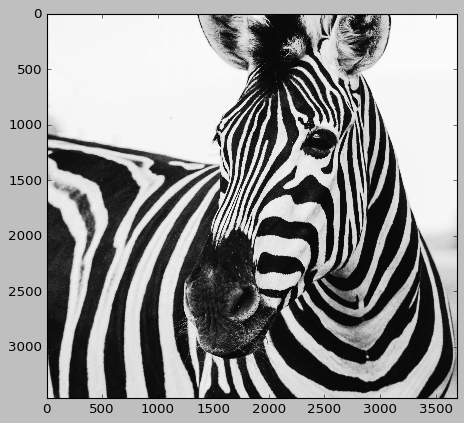

In [9]:
# a la matriz la graficamos con escala de grises
plt.imshow(imagen_mat, cmap = 'gray')
plt.show()

In [10]:
imagen_mat_2 = imagen_mat/10
imagen_mat_2

array([[23.6, 23.6, 23.5, ..., 23.9, 23.9, 23.9],
       [23.6, 23.6, 23.5, ..., 23.9, 23.9, 23.9],
       [23.6, 23.6, 23.5, ..., 23.8, 23.8, 23.8],
       ...,
       [21.7, 21.6, 21.6, ..., 19.7, 19.6, 19.4],
       [21.6, 21.6, 21.6, ..., 19.6, 19.5, 19.3],
       [21.6, 21.6, 21.6, ..., 19.5, 19.5, 19.3]])

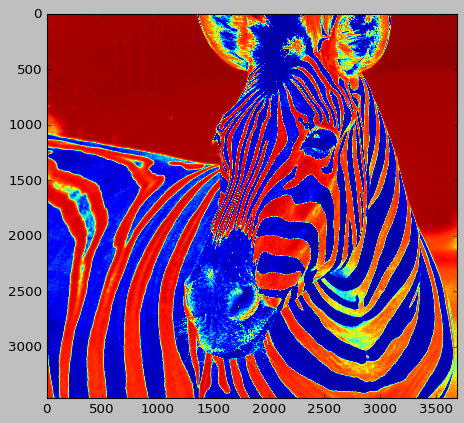

In [12]:
# graficamos la matriz dividida entre 10
plt.imshow(imagen_mat_2)
plt.show()

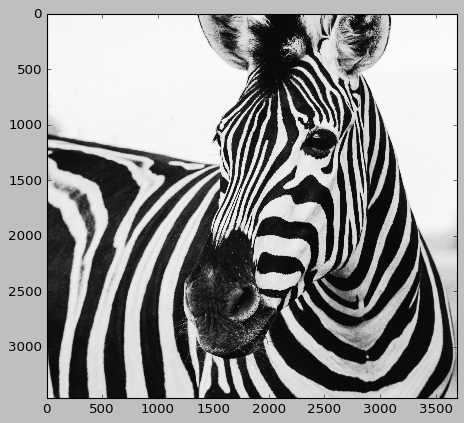

In [13]:
# graficamos la matriz dividida entre 10 y con escala de grises
plt.imshow(imagen_mat_2, cmap = 'gray')
plt.show()

Preservamos la misma imagen a pesar de haber dividido los valores de la matriz entre 10. En machine learning conviene dividir el dataset entre el máximo para que los datos se encuentren entre 0 y 1.

In [14]:
print(np.max(imagen_mat_2))

24.4


In [15]:
print(np.min(imagen_mat_2))

2.5


### Aplicando descomposición SVD a la imagen


In [16]:
# hacemos la descomposición de la matriz
U, D, V =np.linalg.svd(imagen_mat)

In [17]:
# visualizamos la forma de las matrices
print(imagen_mat.shape)
print(U.shape)
print(D.shape)
print(V.shape)

(3456, 3693)
(3456, 3456)
(3456,)
(3693, 3693)


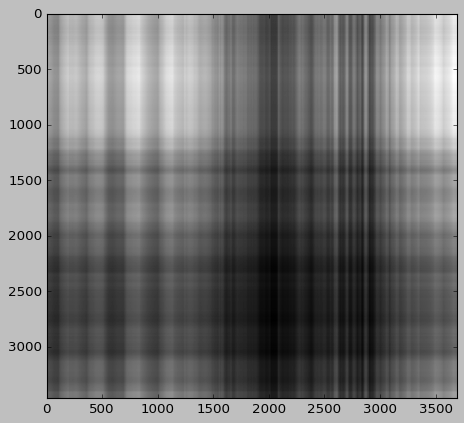

In [18]:
# reconstruimos la imagen a partir de las matrices UDV
imagen_recons = np.matrix(U[:,:1])* np.diag(D[:1])* np.matrix(V[:1,:])
plt.imshow(imagen_recons, cmap = 'gray')

La imagen anterior representa la reconstrucción de la imagen utilizandoo solo un valor singular, es por eso que se escogió la primera columna de la matriz U, el primervalor de la matriz D y la primera fila de la matriz V.

A continuación, veremos cuantos elementos de la matriz D (valores singulares) son necesarios para reconstruir la imagen. Tomando en cuenta que D tiene 3456 valores. 

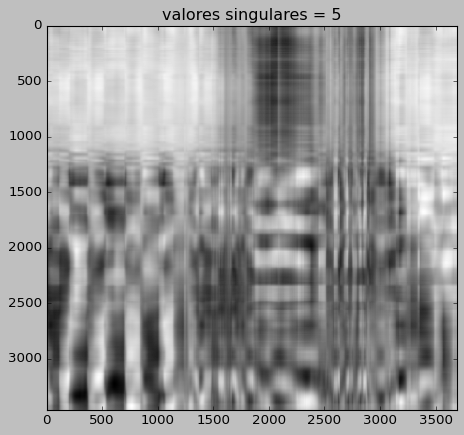

In [20]:
# reconstruyendo la imagen con i valores singulares
i = 5 
imagen_recons = np.matrix(U[:,:i])* np.diag(D[:i])* np.matrix(V[:i,:])
titulo = 'valores singulares = %s' % i
plt.title(titulo)
plt.imshow(imagen_recons, cmap = 'gray')

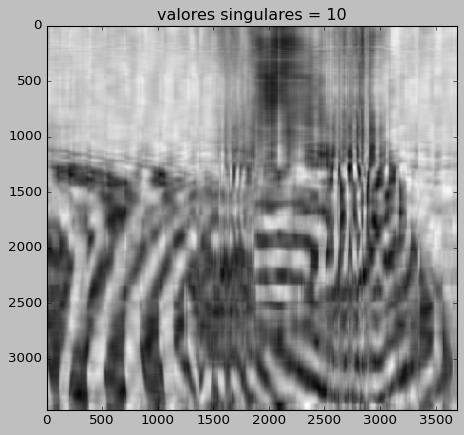

In [22]:
# reconstruyendo la imagen con i valores singulares
i = 10
imagen_recons = np.matrix(U[:,:i])* np.diag(D[:i])* np.matrix(V[:i,:])
titulo = 'valores singulares = %s' % i
plt.title(titulo)
plt.imshow(imagen_recons, cmap = 'gray')

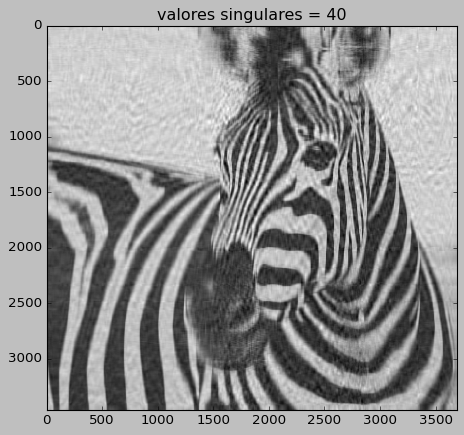

In [24]:
# reconstruyendo la imagen con i valores singulares
i = 40
imagen_recons = np.matrix(U[:,:i])* np.diag(D[:i])* np.matrix(V[:i,:])
titulo = 'valores singulares = %s' % i
plt.title(titulo)
plt.imshow(imagen_recons, cmap = 'gray')

En este punto, con 40 valores singulares son suficientes para visualizar que es un cebra y los bordes están bien definidos. Se descompuso la imagen que originalmente tenía 3456 valores singulares por lo que computacionalmente será más barato procesarla.

### Pseudoinversa de Moore Penrose
Supongamos que tenemos el siguiente problema:
$$ Ax = b$$
Para resolver esto, bastaba con que A tuviera inversa, ya que 
$$Si \; existe \; A^{-1} \Longrightarrow x = A^{-1}b $$
¿Pero que pasa cuando $A$ no tiene inversa? Para ello se define una matriz pseudoinversa $A_{pse}$ tal que
$$AA_{pse} \approx I$$

Una pseudoinversa utilizada es la de Moore Penrose, la cual se define de la siguiente forma:
$$A_{pse} = VD_{pse}U^{T}$$
Donde $D_{pse}$ está asociada a la matriz pseudoinversa, no a la matriz $A$. No se demostrará en este curso pero una de las propiedades de $A_{pse}$ es que en caso de existir, es única.

In [26]:
# pedimos a numpy que los resultados muy cercanos a 0
# los redondee
np.set_printoptions(suppress = True)

In [28]:
A = np.array([[2,3],[5,7],[11,13]])
A

array([[ 2,  3],
       [ 5,  7],
       [11, 13]])

In [29]:
U,D,V = np.linalg.svd(A)
print('U')
print(U)
print('D')
print(D)
print('V')
print(V)

U
[[-0.18499741 -0.47276624 -0.86154979]
 [-0.44249308 -0.74271297  0.50257071]
 [-0.87748267  0.4742041  -0.07179582]]
D
[19.40321383  0.71783924]
V
[[-0.63055377 -0.77614557]
 [ 0.77614557 -0.63055377]]


Para calcular $D_{pse}$ necesitamos hacer algunos pasos:

In [31]:
# 1. definimos una matriz de ceros del tamaño de la matriz A^T
D_pse = np.zeros((A.shape[0], A.shape[1])).T
D_pse

array([[0., 0., 0.],
       [0., 0., 0.]])

In [32]:
print('Valores a reemplazar en D_pse')
print(D_pse[:D.shape[0], :D.shape[0]])

Valores a reemplazar en D_pse
[[0. 0.]
 [0. 0.]]


In [34]:
print('Valores que pondremos en D_pse')
print(np.linalg.inv(np.diag(D)))

Valores que pondremos en D_pse
[[0.05153785 0.        ]
 [0.         1.39306957]]


In [35]:
# 2. Reemplazamos valores de la matriz D_pse con la inversa de 
# la matriz diagonal D
print('D_pse')
D_pse[:D.shape[0], :D.shape[0]] = np.linalg.inv(np.diag(D))
D_pse

D_pse


array([[0.05153785, 0.        , 0.        ],
       [0.        , 1.39306957, 0.        ]])

Ahora si podemos calcular la psudoinversa $A_{pse}$

In [39]:
A_pse = V.T.dot(D_pse).dot(U.T)
A_pse

array([[-0.50515464, -0.78865979,  0.54123711],
       [ 0.42268041,  0.67010309, -0.3814433 ]])

In [38]:
A_pse_numpy = np.linalg.pinv(A)
A_pse_numpy

array([[-0.50515464, -0.78865979,  0.54123711],
       [ 0.42268041,  0.67010309, -0.3814433 ]])

In [40]:
# realizamos el producto A_pse * A y recyoeramos la identidad
A_pse.dot(A)

array([[ 1., -0.],
       [ 0.,  1.]])

In [44]:
# realizamos el producto A * A_pse y tenemos otra cosa
# no satisface la propiedad de la conmutatividad del producto
# como una inversa normal
A.dot(A_pse)

array([[ 0.25773196,  0.43298969, -0.06185567],
       [ 0.43298969,  0.74742268,  0.03608247],
       [-0.06185567,  0.03608247,  0.99484536]])

In [47]:
# otra inversa, aunque numpy siempre calcula la primera por tener
# menos error
A_pse_2 = np.linalg.inv(A.T.dot(A)).dot(A.T)
A_pse_2

array([[-0.50515464, -0.78865979,  0.54123711],
       [ 0.42268041,  0.67010309, -0.3814433 ]])

In [46]:
A_pse_2.dot(A)


array([[ 1., -0.],
       [-0.,  1.]])

### Usando la pseudo inversa para resolver un sistema
Un sistema de ecuaciones puede tener:
- 1 solución, entonces la matriz $A$ tiene inversa y podemos calcular sus soluciones $X = A^{-1}b$
- infinitas soluciones, donde tenemos mas incognitas que ecuaciones
- ninguna solución, cuando tenemos más ecuaciones que incognitas (sistema sobredeterminado)

Para el 3er caso, podemos encontrar una solución X con ayuda de $A_{pse}$ que cumpla $$||Ax-b||$$ sea minima.

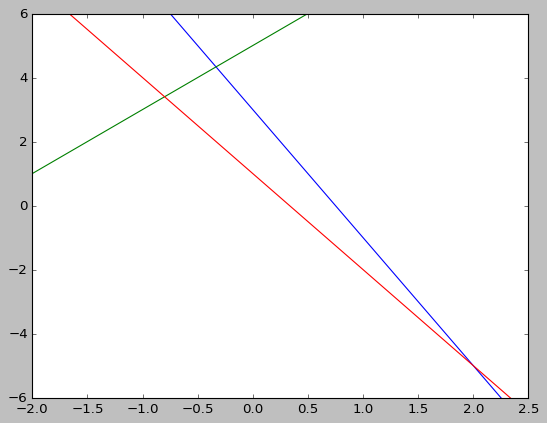

In [50]:
#creamos un sistema sobredeterminado
x = np.linspace(-5,5,1000)

y1 = -4*x + 3
y2 = 2*x + 5
y3 = -3*x +1

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)

plt.xlim(-2, 2.5)
plt.ylim(-6,6)
plt.show()

In [51]:
# matriz asociada al sistema
matriz = np.array([[4,1], [-2,1], [3,1]])
matriz

array([[ 4,  1],
       [-2,  1],
       [ 3,  1]])

In [52]:
# matriz pseudo inversa
matriz_pse = np.linalg.pinv(matriz)
matriz_pse

array([[ 0.11290323, -0.17741935,  0.06451613],
       [ 0.14516129,  0.62903226,  0.22580645]])

In [54]:
# vector b
b = np.array([[3],[5],[1]])
b

array([[3],
       [5],
       [1]])

In [56]:
# resultado
resultado = matriz_pse.dot(b)
resultado

array([[-0.48387097],
       [ 3.80645161]])

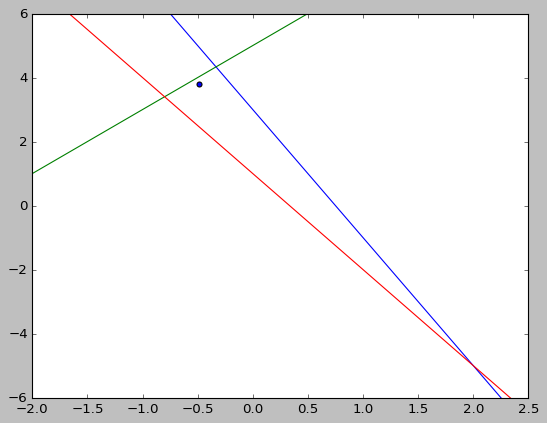

In [57]:
# graficamos las ecuaciones y el resultado
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.scatter(resultado[0], resultado[1])

plt.xlim(-2, 2.5)
plt.ylim(-6,6)
plt.show()

La solucion dada a través de la pseudo inversa es tal que obedece a los pesos de las ecuaciones. Cada ecuacion como tal ejerce un efecto de gravedad que mueve el punto hacia ella.